Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/camilleygrubay/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-9-15 Python-3.12.4 torch-2.3.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


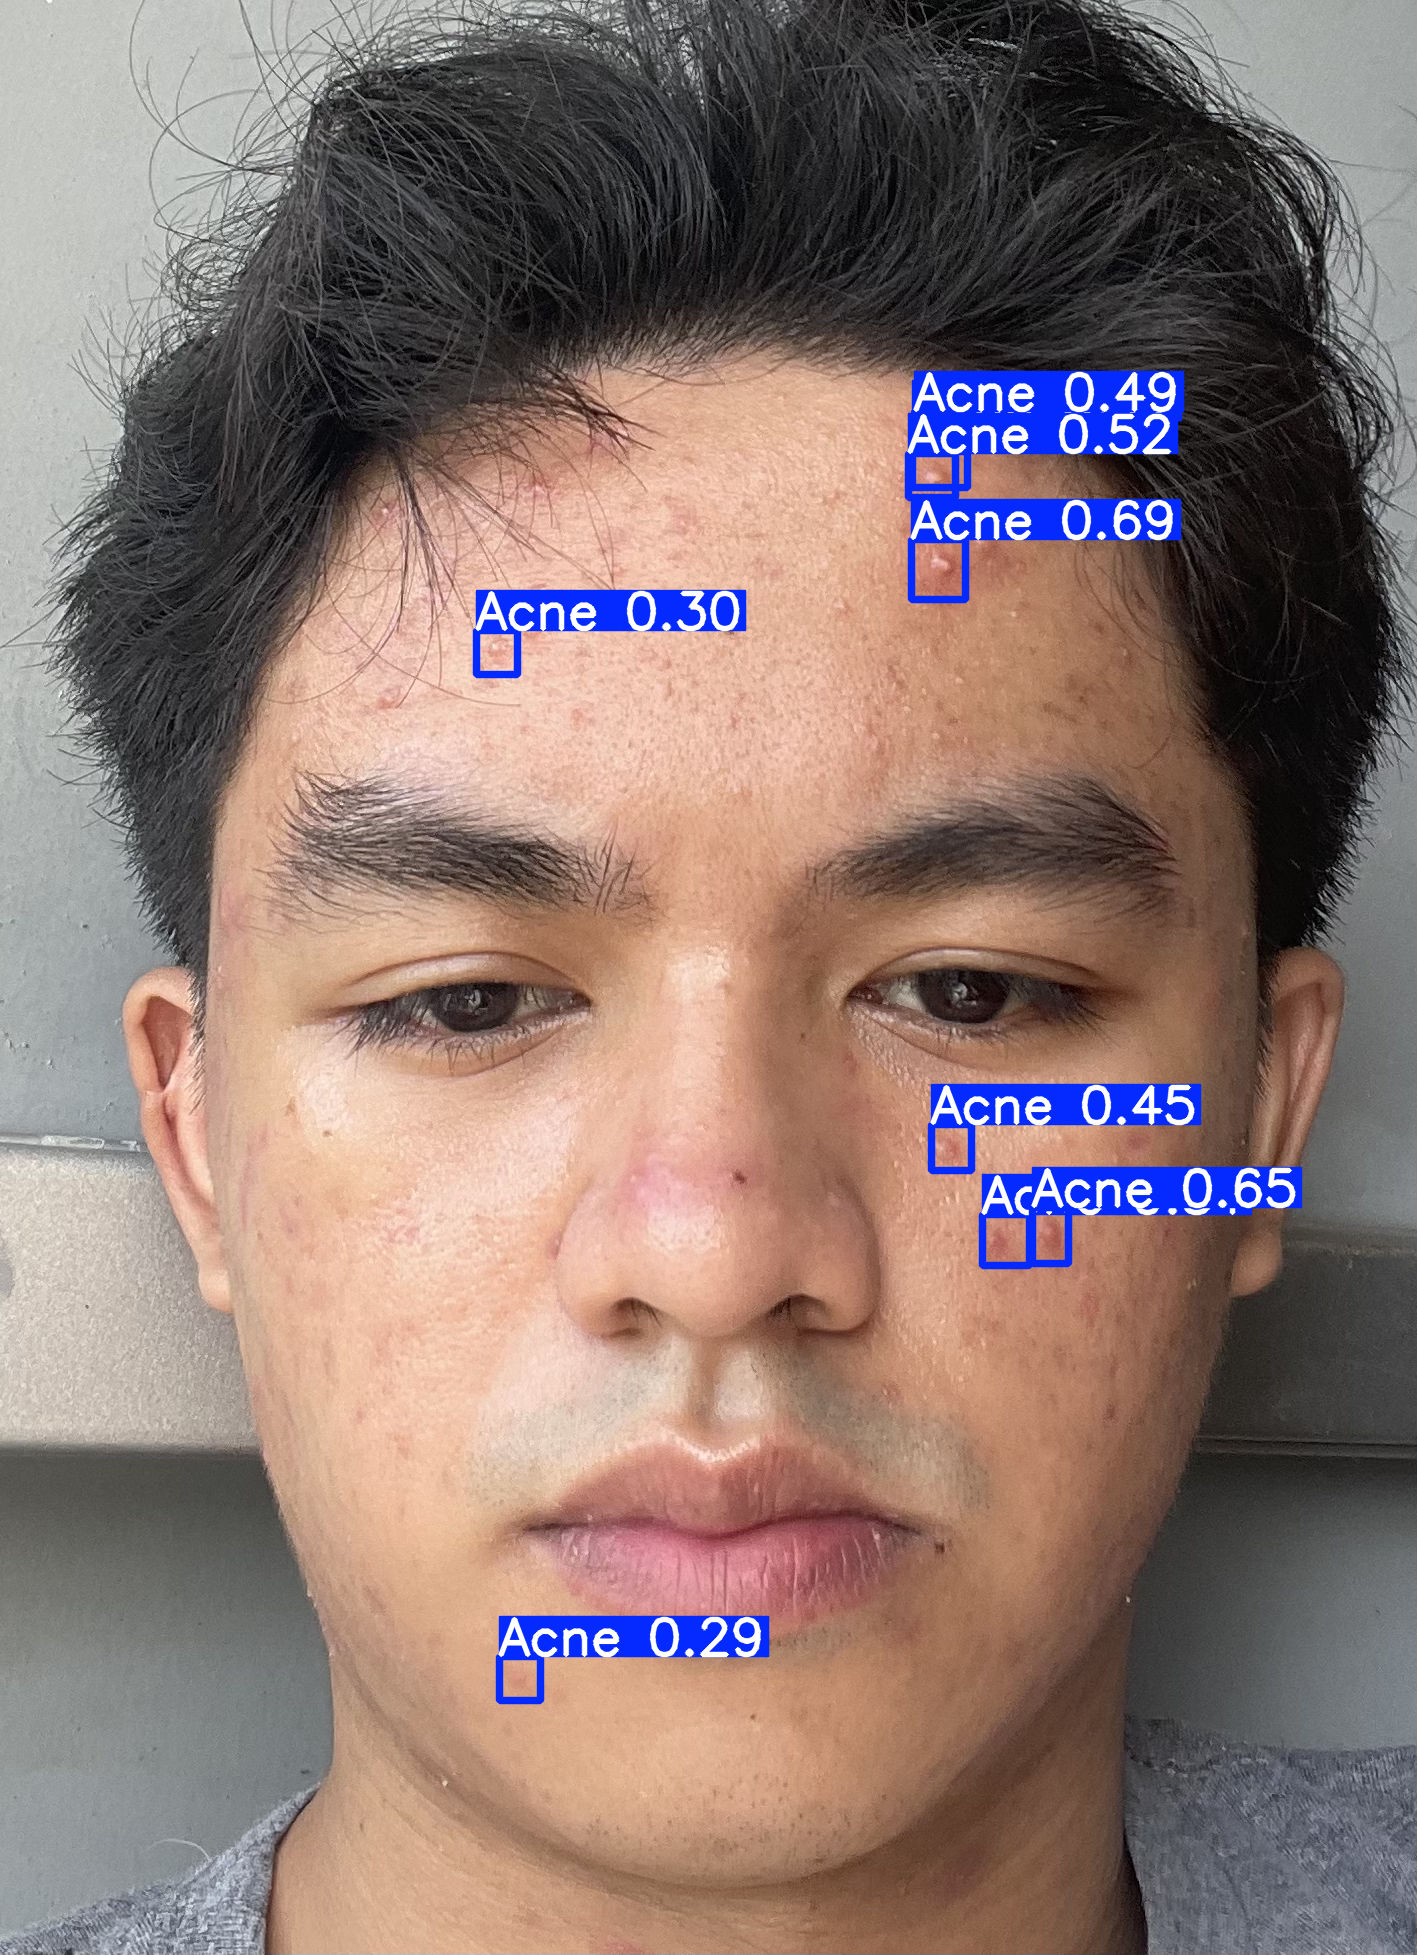

Saved 1 image to .


Results saved to test_result.jpg


In [9]:
import torch
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# Function to load YOLOv5 model
def load_model(weights_path):
    # Load the YOLOv5 model (Make sure your weights file is in this path)
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path, force_reload=True)
    return model

# Function to run inference on an image
def run_inference(model, img_path):
    # Load image
    img = cv2.imread(img_path)
    
    # Check if the image was loaded successfully
    if img is None:
        raise ValueError(f"Error loading image from path: {img_path}. Please check the path and try again.")
    
    # Convert BGR to RGB for correct plotting
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Run inference
    results = model(img_rgb)
    
    # Display results using matplotlib
    results.show()

    # Optionally, save the result image
    result_img_path = Path(img_path).stem + '_result.jpg'
    results.save(save_dir='.', exist_ok=True)  # This saves the image in the current directory
    print(f"Results saved to {result_img_path}")

# Input your image and weights file
weights_path = 'runs/train/yolov5s_cbam2/weights/best.pt'  # Path to your trained model weights
img_path = 'data/test.png'  # Replace with a valid image path

# Load model and run inference
model = load_model(weights_path)
run_inference(model, img_path)


In [10]:
# Import required libraries
import torch
from pathlib import Path
import yaml

# Load the YOLOv5 model from your saved weights
def load_model(weights_path):
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path, force_reload=True)
    return model

# Function to print the model summary and structure
def print_model_structure(model):
    # Print the model summary (layer details, shapes, and parameters)
    print(model)

# Path to your trained weights (best.pt or any other file)
weights_path = 'runs/train/yolov5s_cbam2/weights/best.pt'  # Path to your trained model weights

# Load the model
model = load_model(weights_path)

# Display model structure
print_model_structure(model)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/camilleygrubay/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-9-15 Python-3.12.4 torch-2.3.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [12]:
import torch
from models.yolo import Model

model = Model(cfg='models/yolov5s.yaml')

print(model)


                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   


NameError: name 'CBAM' is not defined